# **GIỚI THIỆU**

## **GIỚI THIỆU VẤN ĐỀ**

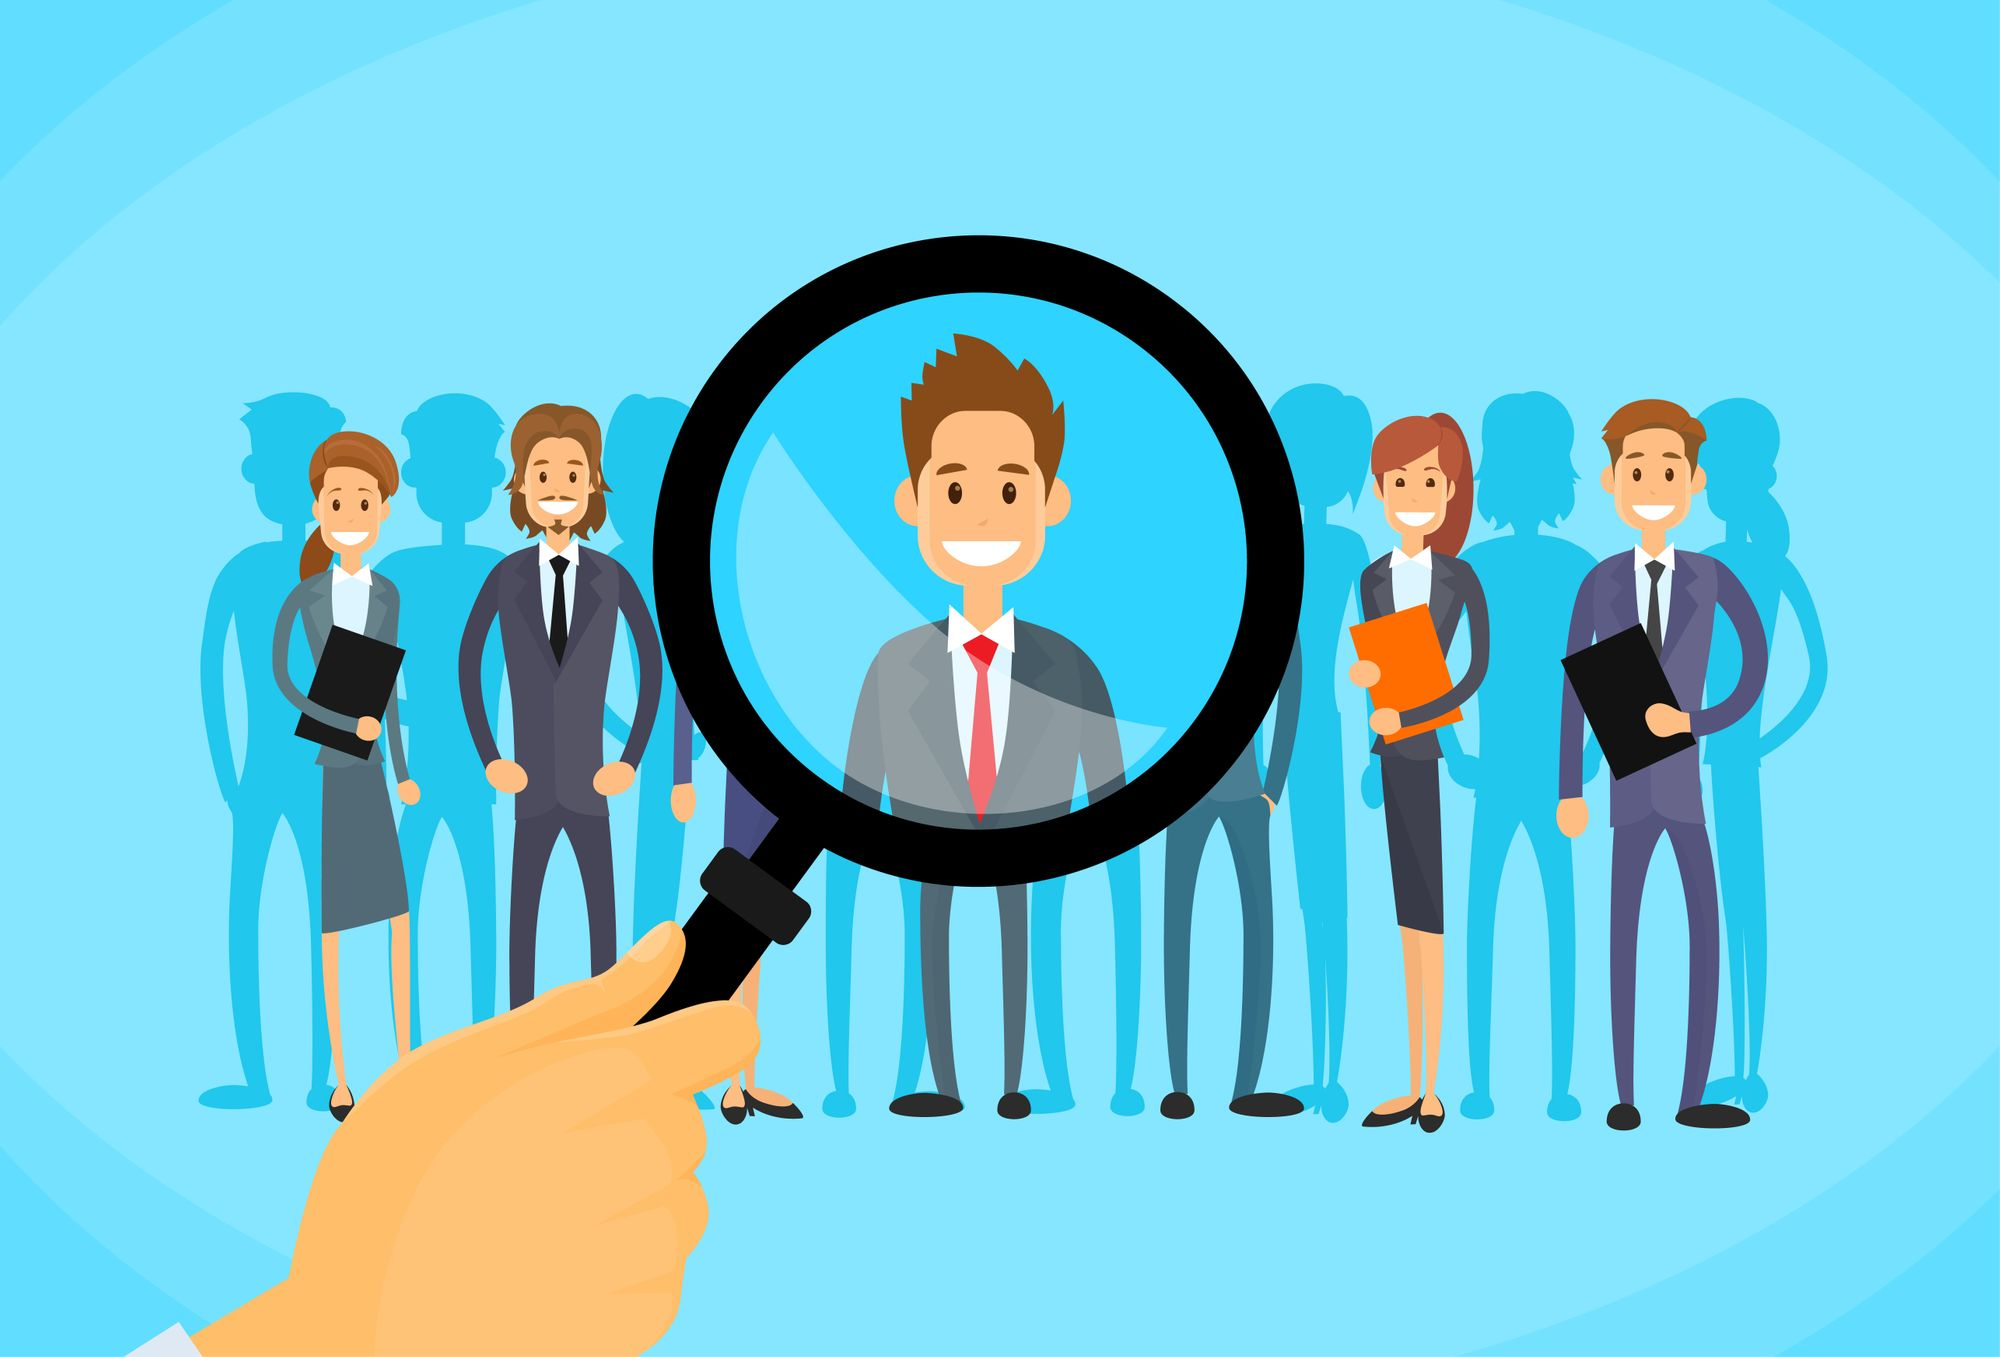

- **Bối cảnh của bài toán:** Trong thời đại bùng nổ dữ liệu, lượng thông tin về người dùng và việc làm ngày càng trở nên phong phú. Tuy nhiên, thực tế cho thấy vẫn còn rất nhiều công việc chưa tìm được ứng viên phù hợp, và ngược lại, nhiều người lao động cũng chưa tìm được công việc tương xứng với năng lực và sở thích của mình. Điều này gây ra tình trạng lãng phí nguồn lực và ảnh hưởng tiêu cực đến sự phát triển xã hội.
- Một trong những kỹ thuật quan trọng trong khai phá dữ liệu nhằm hỗ trợ giải quyết vấn đề này là phân cụm (clustering), phương pháp cho phép nhóm các đối tượng (chẳng hạn như ứng viên hoặc công việc) có đặc điểm tương đồng vào cùng một cụm mà không cần đến nhãn (label) có sẵn. Việc áp dụng phân cụm vào phân tích dữ liệu việc làm sẽ giúp khám phá ra các nhóm công việc có yêu cầu kỹ năng tương tự nhau, cũng như tiêu đề ,vị trí và địa điểm tương đồng nhau. Kết quả phân cụm có thể hỗ trợ nhiều bài toán thực tế như: tìm hiểu đặc điểm từng nhóm đối tượng, tối ưu hóa quá trình tuyển dụng, xây dựng lộ trình đào tạo phù hợp, và là nền tảng cho các hệ thống khuyến nghị trong các bước tiếp theo.

- **LinkedIn:** là một nền tảng mạng xã hội chuyên biệt dành cho môi trường nghề nghiệp. Nền tảng này mang lại nhiều lợi ích cho người dùng, đặc biệt là những ai quan tâm đến việc tìm kiếm cơ hội việc làm, tuyển dụng, hoặc xây dựng mối quan hệ nghề nghiệp. LinkedIn cho phép người dùng chia sẻ sơ yếu lý lịch, kinh nghiệm làm việc, kết nối với các nhà tuyển dụng và những người có cùng chuyên môn trong ngành nghề của mình.

# **1. DOWNLOAD THE DATASET**

Em sẽ sử dụng dataset  [1.3M Linkedin Jobs & Skills (2024)](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024/data?select=linkedin_job_postings.csv)

Bộ dữ liệu được thu thập từ LinkedIn thông qua kỹ thuật web scraping, tức là sử dụng các công cụ tự động để truy cập và trích xuất thông tin từ các trang việc làm công khai. Mặc dù kỹ thuật này phổ biến trong nghiên cứu và thử nghiệm, cần lưu ý rằng việc thu thập dữ liệu từ LinkedIn có thể vi phạm điều khoản dịch vụ của nền tảng hiện đang được lưu trữ trên nền tảng Kaggle

Gồm 3 file csv là **job_skills.csv**,  **job_summary.csv** và **linkedin_job_postings.csv** với tổng kích thước là khoảng 6.19 GB

1. kích thước **job_skills.csv** khoảng 672.72 MB
2. kích thước **job_summary.csv** khoảng 5.1 GB
3. kích thước **linkedin_job_postings.csv** khoảng 415.33 MB

- **job_skills.csv** là bộ dữ liệu chứa các kỹ năng (skills) được trích xuất từ phần mô tả công việc (job summary) bằng kỹ thuật NER (Named Entity Recognition).
- **job_summary.csv** là bộ dữ liệu này bao gồm phần mô tả công việc (job description) được lấy từ LinkedIn.
- **linkedin_job_postings.csv** là bộ dữ liệu được sử dụng trong bài toán là một tập dữ liệu lớn, bao gồm khoảng 1,3 triệu bài đăng tuyển dụng được thu thập từ nền tảng LinkedIn trong năm 2024 thông qua kỹ thuật web scraping.

In [ ]:
!pip install kagglehub[pandas-datasets]

Đăng nhập vào tài khoản Kaggle → vào phần "My Account": https://www.kaggle.com/account

Tại mục API, chọn Create New API Token → Tệp kaggle.json sẽ được tải về.

Tải tệp kaggle.json lên môi trường notebook (Colab hoặc Jupyter).

In [ ]:
from google.colab import files
files.upload()  # chọn file kaggle.json từ máy
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Tải dataset từ kaggle về

Về file **job_skills.csv** có 2 thuộc tính:
1. **job_link:** Đây là liên kết (URL) đến bài đăng công việc cụ thể trên LinkedIn và là **FOREIGN KEY** (khóa ngoại) dùng để liên kết với các bảng dữ liệu khác.
2. **job_skills:** cột chứa danh sách các kỹ năng yêu cầu cho công việc. Dữ liệu trong cột này là một chuỗi các kỹ năng, được phân tách bằng dấu phẩy và khoảng trắng (, )

Về file **linkedin_job_postings.csv** có 14 thuộc tính:
1. **job_link** (kiểu str):	Liên kết URL dẫn đến bài đăng tuyển dụng cụ thể trên nền tảng LinkedIn. Đây là khóa chính hoặc khóa ngoại dùng để liên kết với các bảng dữ liệu khác.
2. **last_processed_time**	(kiểu datetime):	Dấu thời gian ghi nhận lần gần nhất bài đăng được hệ thống xử lý.
3. **got_summary**	(kiểu bool): Giá trị boolean cho biết hệ thống có trích xuất thành công phần mô tả công việc (job summary) hay không.
4. **got_ner**	(kiểu bool):	Cho biết hệ thống có thực hiện phân tích NER (Named Entity Recognition) để trích xuất kỹ năng từ bài đăng hay không.
5. **is_being_worked**	(kiểu bool):	Cho biết bài đăng này hiện có đang được xử lý bởi hệ thống hay không (hữu ích trong các hệ thống xử lý song song).
6. **job_title**	(kiểu str):	Tiêu đề (chức danh) công việc được tuyển dụng.
7. **company**	(kiểu str):	Tên công ty đăng tuyển công việc.
8. **job_location**	(kiểu str):	Địa điểm làm việc (có thể là tên thành phố, vùng, hoặc quốc gia).
9. **first_seen**	(kiểu datetime):	Thời điểm hệ thống lần đầu phát hiện bài đăng này.
10. **search_city**	(kiểu str):	Thành phố được sử dụng làm tiêu chí tìm kiếm khi thu thập dữ liệu (có thể khác với job_location nếu bài đăng có tính chất từ xa hoặc rộng địa lý).
11. **search_country**	(kiểu str):	Quốc gia được sử dụng làm tiêu chí tìm kiếm khi thu thập bài đăng công việc. Cột này giúp phân loại các công việc theo quốc gia và có thể hỗ trợ phân tích xu hướng tuyển dụng theo khu vực.
12. **search_position**	(kiểu str):	Chức danh (vị trí) công việc được sử dụng làm tiêu chí tìm kiếm.
13. **job_level**	(kiểu str):	Mức độ của công việc.
14. **job_type**	(kiểu str):	Loại công việc.

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
file_path = "job_skills.csv"  # giả sử đây là tên file chính
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "asaniczka/1-3m-linkedin-jobs-and-skills-2024",
    file_path,
)

file_path = "linkedin_job_postings.csv"
df2 = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "asaniczka/1-3m-linkedin-jobs-and-skills-2024",
    file_path,
)
print("First 5 records:", df.head())
print("First 5 records:", df2.head())

## **Merge dataset**

Phân cụm công việc dựa trên kỹ năng công việc nên việc em quyết định gộp 2 file dataset là job_skills.csv và linkedin_job_postings.csv. Còn file job_summary.csv thì có dung lượng khá lớn khoảng 5.1 GB với lại không cần thiết trong bài toán này( Có thể mở rộng sau này )

In [ ]:
import numpy as np
import pandas as pd
linkedin_job_posting = pd.merge(df, df2, on='job_link', how='inner')

# **2. DATA CLEANING**

In [ ]:
linkedin_job_posting.describe()

In [ ]:
linkedin_job_posting.info()

Nhìn tổng quan thì dữ liệu sau khi merge có 1296381 mẫu và có 16 cột. Ta thấy được một vài cột bị thiếu dữ liệu như job_skills, company, job_location. Với hệ thống khuyến nghị việc làm theo job_skills và job_summary thì việc khuyết dữ liệu có thể gây ảnh hưởng khá lớn đến kết quả phân cụm trong hệ thống khuyến nghị

In [ ]:
linkedin_job_posting.head()

## **MISSING VALUES**

In [ ]:
linkedin_job_posting.isna().sum()

Vậy việc thiếu ở cột company và job_location là con số rất ít nhưng cột job_skills lại thiếu cũng kha khá nhiều mặc dù so với tổng mẫu thì vẫn khá ít nên chúng ta sẽ xóa các mẫu có những cột có giá trị null

In [ ]:
linkedin_job_posting= linkedin_job_posting.dropna()
linkedin_job_posting.isna().sum()

## **HANDLING DUPLICATES**

In [ ]:
linkedin_job_posting.duplicated().sum()

Nếu có thì loại bỏ

In [ ]:
linkedin_job_posting = linkedin_job_posting.drop_duplicates(keep='first') # Loại bỏ các bản sao, giữ lại bản đầu tiên
duplicates = linkedin_job_posting[linkedin_job_posting.duplicated()]
duplicates

# **3. LẤY 50000 MẪU NGẪU NHIÊN CỐ ĐỊNH**

Chọn 50000 mẫu để thực hiện tiền xử lý, phân tích và xây dựng mô hình. Việc chọn mẫu vẫn đảm bảo tính đại diện nhờ phương pháp lấy ngẫu nhiên và giữ nguyên phân bố tổng thể. Mục đích đảm bảo hiệu quả xử lý và phù hợp với giới hạn tài nguyên tính toán. Kết hợp việc lọc chỉ lấy mẫu Tiếng Anh

In [ ]:
!pip install langdetect

Lấy 50000 mẫu ngẫu nhiên cố định

In [ ]:
import pandas as pd
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from tqdm import tqdm

DetectorFactory.seed = 0
def is_english(text):
    try:
        if not isinstance(text, str) or len(text.strip()) < 2:
            return True  # Những kỹ năng ngắn như "C", "R", "SQL" vẫn giữ lại
        return detect(text) == 'en'
    except LangDetectException:
        return True
    except:
        return True

# Chuẩn bị mẫu
sample = []
count = 0
target = 50000

# Duyệt từng dòng (dùng tqdm để theo dõi tiến trình)
for _, row in tqdm(linkedin_job_posting.iterrows(), total=len(linkedin_job_posting)):
    skills = row['job_skills']
    if not isinstance(skills, str):
        continue
    first_skill = skills.split(', ')[0]
    if is_english(first_skill):
        sample.append(row)
        count += 1
    if count >= target:
        break
# Tạo DataFrame kết quả
sampled_filtered = pd.DataFrame(sample)
# Lưu (nếu cần)
sampled_filtered.to_csv('linkedin_job_posting_english_sample.csv', index=False)
# Kiểm tra
print(f"Số hàng trong mẫu: {len(sampled_filtered)}")
print(sampled_filtered[['job_skills']].head())

Lưu thành 1 file tên linkedin_job_posting_english_sample.csv và tải về

In [ ]:
from google.colab import files
files.download('linkedin_job_posting_english_sample.csv')

# **LOAD THE NEW DATASET**

Tải dữ liệu 50000 bản ghi đã được xử lí thành công

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
linkedin_job_posting=pd.read_csv('linkedin_job_posting_english_sample.csv')

# **EDA**

TOP 10 job từ linkedin trong tập dữ liệu 50000 mẫu

In [ ]:
top_jobs=linkedin_job_posting["job_title"].value_counts().head(10)
top_jobs

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
top_jobs.plot(kind="bar",color="magenta")
plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Titles', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.figure(figsize=(8, 12))
plt.show()

TOP 10 công ty tuyển dụng việc làm phổ biến trong mẫu

In [ ]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('Set3', len(linkedin_job_posting['company'].unique()))  # You can choose a different color palette
top_companies = linkedin_job_posting['company'].value_counts().head(10)
top_companies.plot(kind='barh', color=colors, edgecolor='black')
plt.title('Top 10 Companies', fontsize=16)
plt.xlabel('Companies', fontsize=14)
plt.ylabel('Number of Job companines', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

CÓ CÁC LOẠI CÔNG VIỆC NÀO

In [ ]:
job_type=linkedin_job_posting["job_type"].value_counts()
job_type

In [ ]:
plt.pie(job_type,labels=job_type.index,autopct='%1.1f%%')
cen_cir=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(cen_cir)
plt.axis('equal')
plt.title('variety job type avaliable in 50000 samples')
plt.show()

Có bao nhiêu vị trí công việc ?

In [ ]:
level=linkedin_job_posting['job_level'].value_counts()
level

In [ ]:
plt.pie(level,labels=level.index,autopct='%1.1f%%')
cen_cir=plt.Circle((0,0),0.70,fc='white')
fig=plt.gcf()
fig.gca().add_artist(cen_cir)
plt.axis('equal')
plt.title('variety job postions avaliable in linkedin')
plt.show()

TOP 10 SKILL phổ biến trong tập dữ liệu mẫu

In [ ]:
skills=linkedin_job_posting["job_skills"].value_counts().head(10)
skills

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
skills.plot(kind="bar",color="magenta")
plt.title('Top 10 Job skills', fontsize=16)
plt.xlabel('Job Titles', fontsize=14)
plt.ylabel('Number of Job Listings', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.figure(figsize=(8, 12))
plt.show()

# **DATA PREPROCESSING**

- Trong phần này, chúng ta sẽ tiến hành tiền xử lý dữ liệu để thực hiện các thao tác phân cụm.
- Các bước sau sẽ được áp dụng để tiền xử lý dữ liệu:
  1. Mã hóa nhãn cho các đặc trưng phân loại

  2. Chuẩn hóa các đặc trưng bằng cách sử dụng standard scaler

In [ ]:
# Kiểm tra các cột có kiểu dữ liệu là 'category'
category_columns = linkedin_job_posting.select_dtypes(include=['object']).columns
print("Các cột kiểu category:", category_columns)

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Khởi tạo LabelEncoder
LE = LabelEncoder()
# Lặp qua các cột có kiểu dữ liệu là object (phân loại)
for i in category_columns:
    linkedin_job_posting[i] = LE.fit_transform(linkedin_job_posting[i])
print("Tất cả features giờ đều là kiểu dữ liệu numerical")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
ds = linkedin_job_posting.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['got_summary','got_ner',	'is_being_worked', 'search_city',	'search_country',	'search_position']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

Quyết định dùng các đặc trưng liên quan đến công việc như skill job, tên job, địa điểm job, job level và loại công việc để làm đầu vào cho mô hinh phân cụm

In [ ]:
linkedin_job_posting.describe()

In [ ]:
scaled_ds =  scaled_ds[["job_skills","job_title","job_location","job_level"]]

In [ ]:
print("Đây là dataframe được sử dụng cho model")
scaled_ds.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = scaled_ds.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Biểu đồ tương quan giữa các đặc trưng")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = scaled_ds
# Trực quan hóa với box plot để phát hiện outliers
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Box Plot để Phát Hiện Nhiễu (Outliers)')
plt.ylabel('Giá trị')
plt.xticks(rotation=45)
plt.show()

if len(df.columns) >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.5)
    plt.title('Scatter Plot để Phát Hiện Nhiễu')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
df = scaled_ds
for column in df.columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
print("Dữ liệu sau khi loại bỏ outliers:")
print(df)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Biến phân loại ví dụ: job_type, job_level, company
for col in ['job_skills', 'job_level', 'company']:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=linkedin_job_posting, x=col, order=linkedin_job_posting[col].value_counts().index[:10])
    plt.title(f'Phân phối giá trị của {col}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
scaled_ds = df
scaled_ds.shape

# **TRAIN MODEL**

## **Phân cụm là gì?**

Phân cụm dữ liệu là bài toán gom nhóm các đối tượng dữ liệu vào thánh từng cụm (cluster) sao cho các đối tượng trong cùng một cụm có sự tương đồng theo một tiêu chí nào đó.

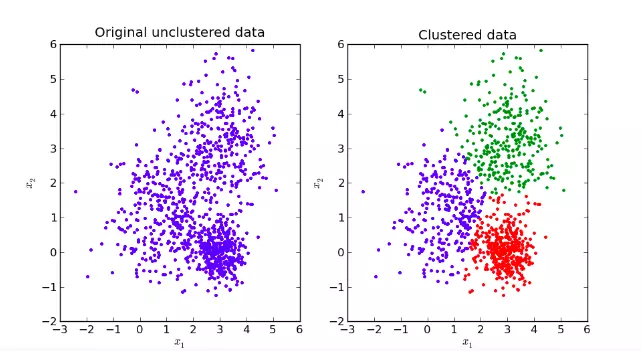

## MiniBatch

sử dụng Elbow Method (phương pháp khuỷu tay) để xác định số lượng cụm tối ưu khi phân cụm dữ liệu bằng thuật toán K-means

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=50, random_state=42)
Elbow_M.fit(scaled_ds)
Elbow_M.show()

In [ ]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
kmeans = MiniBatchKMeans(n_clusters=12, random_state=42)
clusters = kmeans.fit_predict(scaled_ds)
# PCA_ds['cluster_mini'] = clusters
df['cluster_mini'] = clusters

## **DBSCAN**

Khi biểu diễn các điểm dữ liệu trong không gian chúng ta sẽ thấy rằng thông thường các vùng không gian có mật độ cao sẽ xen kẽ bởi các vùng không gian có mật độ thấp. Nếu như phải dựa vào mật độ để phân chia thì khả năng rất cao những tâm cụm sẽ tập trung vào những vùng không gian có mật độ cao trong khi biên sẽ rơi vào những vùng không gian có mật độ thấp. Trong lớp các mô hình phân cụm của học không giám sát tồn tại một kĩ thuật phân cụm dựa trên mật độ (Density-Based Clustering), kĩ thuật này này đề cập đến các phương pháp học không giám sát nhằm xác định các cụm phân biệt trong phân phối của dữ liệu, dựa trên ý tưởng rằng một cụm trong không gian dữ liệu là một vùng có mật độ điểm cao được ngăn cách với các cụm khác bằng các vùng liền kề có mật độ điểm thấp .

DBSCAN là một thuật toán cơ sở để phân nhóm dựa trên mật độ. Nó có thể phát hiện ra các cụm có hình dạng và kích thước khác nhau từ một lượng lớn dữ liệu chứa nhiễu.

**Phân cụm không gian dựa trên mật độ có tính đến nhiễu (DBSCAN)**
1. Thuật toán phân cụm dựa trên mật độ không gian có tính đến nhiễu.
2. DBSCAN có thể tìm được các cụm không tuyến tính (không thể phân tách bằng đường thẳng). Cho phép tạo ra các cụm có hình thù tùy ý
3. Không phải tất cả các điểm đều được gán vào cụm. Các outliers sẽ không được gắn vào cụm
4. Không cần xác định trước số lượng cụm K.
5. DBSCAN có thể nhóm các điểm dữ liệu thành các hình dạng bất kỳ.
6. DBSCAN có khả năng chống chịu tốt với nhiễu.

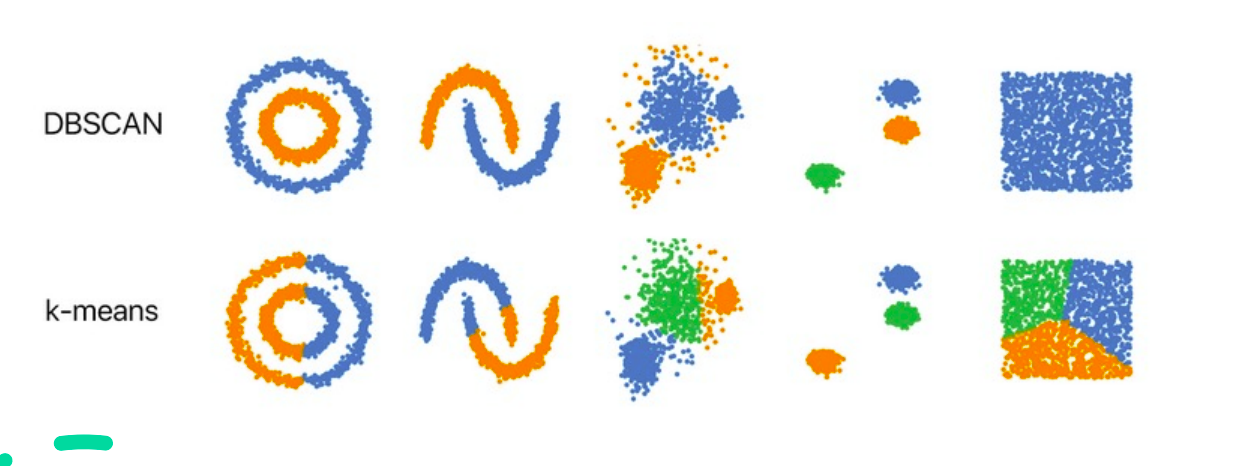

**ƯU ĐIỂM**
1. Tự động xác định số lượng cụm:
Không cần phải chỉ định trước số cụm như K-means.

2. Phát hiện được các cụm có hình dạng bất kỳ:
Không như K-means chỉ phát hiện cụm hình cầu, DBSCAN xử lý tốt các cụm dạng phi tuyến, phức tạp.

3. Chống nhiễu tốt:
DBSCAN có thể phân biệt điểm nhiễu (noise/outliers) nên phù hợp với dữ liệu thực có nhiễu.

4. Không phụ thuộc vào tâm cụm:
Không bị ảnh hưởng bởi tâm cụm như các thuật toán centroid-based.


**NHƯỢC ĐIỂM**
1. Khó chọn tham số tốt (ε và minPts):
Hai tham số này ảnh hưởng lớn đến kết quả phân cụm và khó xác định với dữ liệu phức tạp.

2. Không hoạt động tốt với dữ liệu có mật độ cụm không đồng đều:
Nếu một cụm có mật độ thưa hơn cụm khác, DBSCAN có thể coi cụm đó là nhiễu.

3. Hiệu năng không cao với dữ liệu lớn hoặc nhiều chiều (high-dimensional data):
Do phụ thuộc nhiều vào việc tính khoảng cách, nó có thể chậm với tập dữ liệu lớn hoặc nhiều chiều.

4. Không hoạt động tốt khi khoảng cách không đo được theo kiểu Euclidean:
Với dữ liệu không thể tính khoảng cách một cách hợp lý, DBSCAN không phát huy được sức mạnh.

### **CÁC THAM SỐ CẦN QUAN TÂM TRONG DBSCAN**

**ĐỊNH NGHĨA THAM SỐ CHO DBSCAN**
1. ĐỊNH NGHĨA 2 THAM SỐ:
  - eps (epsilon):
Khoảng cách tối đa để xác định hàng xóm. Hai điểm được coi là neighbors nếu khoảng cách giữa chúng ≤ eps.
  - minPts (minimum points):
Số lượng điểm tối thiểu cần có trong vùng lân cận (bán kính eps) để một điểm được coi là core point.

2. ĐỊNH NGHĨA 1 KHÁI NIỆM:
  - Core point:
Một điểm được gọi là core point nếu có ít nhất minPts điểm (bao gồm cả chính nó) nằm trong vùng lân cận bán kính eps.

**Trong đó các tham số chính cần quan tâm đó là**
- **eps:** Chính là khoảng cách
 giúp xác định các điểm nằm trong vùng lân cận epsilon. Đây cũng là giá trị khó xác định nhất và tuỳ thuộc vào đặc trưng phân phối của mỗi bộ dữ liệu.

- **min_samples:** Số lượng tối thiểu các điểm láng giềng xung quanh một điểm để xác định một điểm lõi, số lượng này đã bao gồm điểm lõi. Tương đương với minPts+1 đã giới thiệu ở trên.

- **metric:** Hàm khoảng cách để đo lường khoảng cách giữa hai điểm bất kì, nhận mặc định là euclidean. Hàm khoảng cách và giá trị
 là hai tham số có mối quan hệ chặt chẽ và ảnh hưởng qua lại lẫn nhau và ảnh hưởng lên kết quả phân cụm.

- **algorithm:** Phương pháp được sử dụng để xác định các điểm láng giềng. Bao gồm các phương pháp auto, ball_tree, kd_tree, brute. Mặc định là auto. Về những phương pháp này bạn có thể tìm hiểu thêm tại sklearn.neighbors.

### **CÁC BƯỚC CỦA THUẬT TOÁN DBSCAN:**

1. Đếm số lượng điểm lân cận của từng điểm trong dữ liệu. Nếu một điểm có ít nhất minPts điểm nằm trong bán kính eps quanh nó, thì điểm đó được gọi là core point.

2. Chọn ngẫu nhiên một core point chưa thuộc cụm nào.
- Nếu không còn core point nào chưa được gán cụm, thuật toán sẽ kết thúc. Nếu chọn được một core point, thì:
  - Gán nó vào một cụm mới.
  - Mở rộng cụm đó bằng cách tìm các điểm lân cận của nó:
    - Nếu những điểm đó cũng là core points, tiếp tục mở rộng thêm nữa.
- Nếu không phải core point nhưng là hàng xóm của core point, thì chỉ thêm vào cụm, không mở rộng tiếp.

3. Lặp lại quá trình mở rộng cho đến khi không thể thêm điểm nào vào cụm nữa.

4. Tăng số thứ tự cụm lên, rồi quay lại bước 2 để tìm thêm cụm mới. Những điểm không phải là core point và cũng không phải hàng xóm của core point nào sẽ được xem là outliers (nhiễu) và không được gán vào cụm nào cả.




### **Cách Chọn 2 tham số Epsilon và MinPts**

- **Epsilon (ε):**
Nó giống như bán kính của một cái vòng tròn vẽ quanh mỗi điểm dữ liệu.
  - Mình dùng vòng tròn này để xem xung quanh điểm đó có bao nhiêu điểm lân cận gần nó.
  - Nếu trong vòng tròn đó đủ đông người (đủ điểm gần đó), thì điểm đó được coi là trung tâm của một cụm (core point).
- **Cách chọn**:
  - Tính khoảng cách từ mỗi điểm đến vài người hàng xóm gần nó (gọi là k-distance).
  - Vẽ biểu đồ khoảng cách đó.
  - Nhìn chỗ biểu đồ gập lại (góc khuỷu - elbow), đó là giá trị epsilon nên chọn

- **minPoints (MinPts):**
  - Là số lượng điểm tối thiểu cần nằm trong vòng tròn (với bán kính là epsilon) để được tính là một cụm.
  - Nếu ít hơn số này thì không tạo cụm được.
  - Nếu bạn chọn minPoints là 1 thì mỗi điểm sẽ thành một cụm riêng → sai mục đích luôn 😅

- **Cách chọn:**
  - Nên ≥ số chiều dữ liệu + 1 hoặc số chiều * 2 + 1
  - Ví dụ: Dữ liệu có 2 chiều → chọn MinPts = 3 hoặc 4.
  - Dữ liệu nhiễu nhiều → chọn MinPts lớn hơn nữa.

Với epsilon quá nhỏ, mọi thứ đều trở thành nhiễu. Nhưng nếu epsilon quá lớn nó sẽ gom hết tất cả thành 1 cụm duy nhất

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
np.random.seed(42)
neigh = NearestNeighbors(n_neighbors=5)
neigh.fit(df)
# Lấy khoảng cách từ mỗi điểm đến k hàng xóm gần nhất
distances, indices = neigh.kneighbors(df)
# Lấy khoảng cách lớn nhất trong mỗi nhóm k hàng xóm
# vì khoảng cách hàng xóm gần nhất đứng đầu, nên lấy cột cuối (cột thứ k-1)
k_distances = distances[:, 4]
# Sắp xếp khoảng cách theo thứ tự tăng dần
k_distances = np.sort(k_distances)
# Vẽ biểu đồ K-distance để tìm "elbow"
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title("K-distance Graph (để tìm epsilon)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{6}-th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

Ở đây điểm gập mạnh hay khuỷu tay ở 4.2 nhưng ta sẽ chọn lớn hơn một chút để “bao” được cụm , nên là lấy 4.5
- Còn minPts thì lấy số chiều +1  ở đây đã giảm còn 3 chiều nên 4+1=5

In [ ]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
np.random.seed(42)
# Khởi tạo mô hình DBSCAN (có thể điều chỉnh eps và min_samples tùy dữ liệu)
db = DBSCAN(eps=0.18, min_samples=5)
# Huấn luyện mô hình và dự đoán nhãn cụm
DB = db.fit_predict(scaled_ds)
df["clusters_dbscan"] = DB

# **EVALUATION**

Có một số phương pháp đánh giá phân cụm như sau:
1. Đánh giá trong (internal evaluation) là phương pháp đánh giá kết quả dựa trên chính dữ liệu được phân cụm bằng cách sử dụng các đại lượng đánh giá sự gắn kết của cụm như mật độ (density) , khoảng cách giữa các phần tử trong cụm hay khoảng cách giữa các cụm với nhau

2. Đánh giá ngoài (external evaluation) là phương pháp đánh giá kết quả dựa trên tập dữ liệu chuẩn (dữ liệu mẫu ) đã được phân cụm từ trước đó , còn gọi là tập benchmark.

3. đánh giá phân cụm bằng cách so sánh với các kết quả phân cụm khác được sinh ra bởi cùng 1 thuật toán nhưng có các tham số đầu vào khác nhau

## **SILHOUETTE SCORE**

Đây là một chỉ số đánh giá độ hợp lý của các cụm được phân chia. Silhouette score có giá trị trong khoảng từ -1 đến 1, trong đó:
- 1: Các điểm trong cụm rất gần nhau và các cụm khác biệt rõ ràng.

- 0: Các điểm nằm giữa hai cụm.

- -1: Các điểm có thể bị phân vào cụm khác.

Đo độ gắn kết (cohesion) nội cụm và độ tách biệt (separation) giữa các cụm.

Dùng được với nhiều thuật toán.

Dùng với khoảng cách cosine nếu dữ liệu dạng TF-IDF.

Tham số:
  - **X**: Đây là dữ liệu đầu vào, thường là ma trận các đặc trưng của dữ liệu (mỗi dòng là một điểm dữ liệu, mỗi cột là một đặc trưng).
  - **labels**: Đây là nhãn của các cụm mà thuật toán phân cụm đã gán cho từng điểm. Nếu bạn đang sử dụng DBSCAN, điểm ngoại lệ có thể có nhãn là -1.

- Công thức tính Silhouette Score dựa trên hai giá trị:
  - a(i): Khoảng cách trung bình giữa điểm
𝑖
i và các điểm trong cùng một cụm.

  - b(i): Khoảng cách trung bình giữa điểm
𝑖
i và các điểm trong cụm gần nhất.

In [ ]:
from sklearn.metrics import silhouette_score
score_mini = silhouette_score(df, clusters)
score_db = silhouette_score(df, DB)
print(f"Silhouette Score MiniBatch: {score_mini:.4f}")
print(f"Silhouette Score DBSCAN: {score_db:.4f}")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
score_data = pd.DataFrame({
    "Algorithm": ["MiniBatchKMeans", "DBSCAN"],
    "Silhouette Score": [score_mini, score_db]
})
# Vẽ biểu đồ
plt.figure(figsize=(6, 5))
sns.barplot(data=score_data, x="Algorithm", y="Silhouette Score", hue="Algorithm", palette="Set2", legend=False)
plt.title("Comparison of Silhouette Scores")
plt.ylim(0, 1)
# Ghi điểm lên cột
for index, row in score_data.iterrows():
    plt.text(index, row["Silhouette Score"] + 0.02, f"{row['Silhouette Score']:.4f}",
             ha='center', va='bottom', fontweight='bold')
plt.show()

## Davies-Bouldin Index

Chỉ số Davies-Bouldin đánh giá sự phân tách giữa các cụm. Chỉ số này càng nhỏ thì các cụm càng được phân biệt tốt hơn. Thông thường, một chỉ số thấp hơn sẽ chỉ ra rằng các cụm có sự phân biệt rõ ràng hơn.

Đánh giá độ giống nhau giữa các cụm – càng thấp càng tốt.

Dễ tính toán, dùng để so sánh giữa các mô hình.

In [ ]:
from sklearn.metrics import davies_bouldin_score
X_dense = df
db_score = davies_bouldin_score(X_dense, DB)
mini_score = davies_bouldin_score(X_dense, clusters)
print("Davies-Bouldin Score MiniBatch:", mini_score)
print("Davies-Bouldin Score DBSCAN:", db_score)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Dữ liệu điểm DB
db_scores = pd.DataFrame({
    "Algorithm": ["MiniBatchKMeans", "DBSCAN"],
    "Davies-Bouldin Score": [mini_score, db_score]
})
# Vẽ biểu đồ
plt.figure(figsize=(6, 5))
sns.barplot(data=db_scores, x="Algorithm", y="Davies-Bouldin Score", hue="Algorithm", palette="Set3", legend=False)
plt.title("Comparison of Davies-Bouldin Scores")
plt.ylim(0, max(db_scores["Davies-Bouldin Score"]) + 0.5)

# Ghi điểm lên cột
for index, row in db_scores.iterrows():
    plt.text(index, row["Davies-Bouldin Score"] + 0.05, f"{row['Davies-Bouldin Score']:.4f}",
             ha='center', va='bottom', fontweight='bold')
plt.show()

## **Calinski-Harabasz Index (Variance Ratio Criterion)**

Càng cao càng tốt

Đánh giá dựa trên tỉ lệ giữa khoảng cách giữa cụm và trong cụm.

In [ ]:
from sklearn.metrics import calinski_harabasz_score
X_dense = df
ch_score_mini = calinski_harabasz_score(X_dense, clusters)
ch_score_db = calinski_harabasz_score(X_dense, DB)
print("Davies-Bouldin Score MiniBatch:", ch_score_mini)
print("Davies-Bouldin Score DBSCAN:", ch_score_db)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Tạo DataFrame
ch_scores = pd.DataFrame({
    "Algorithm": ["MiniBatchKMeans", "DBSCAN"],
    "Calinski-Harabasz Score": [ch_score_mini, ch_score_db]
})
# Vẽ biểu đồ
plt.figure(figsize=(6, 5))
sns.barplot(data=ch_scores, x="Algorithm", y="Calinski-Harabasz Score", hue="Algorithm", palette="pastel", legend=False)
plt.title("Comparison of Calinski-Harabasz Scores")
plt.ylim(0, max(ch_scores["Calinski-Harabasz Score"]) * 1.1)
# Ghi giá trị lên cột
for index, row in ch_scores.iterrows():
    plt.text(index, row["Calinski-Harabasz Score"] * 1.02, f"{row['Calinski-Harabasz Score']:.2f}",
             ha='center', va='bottom', fontweight='bold')

plt.show()

## **XEM XÉT CÁCH KHÁC**

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title("Visualized Clusters of MiniBatch")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=DB, cmap='viridis')
plt.title("Visualized Clusters of DBSCAN")
plt.show()

## **TỔNG HỢP LẠI**

In [ ]:
import pandas as pd
# Tạo DataFrame tổng hợp
metrics_df = pd.DataFrame({
    "Algorithm": ["MiniBatchKMeans", "DBSCAN"],
    "Silhouette Score": [score_mini, score_db],
    "Davies-Bouldin Score": [mini_score, db_score],
    "Calinski-Harabasz Score": [ch_score_mini, ch_score_db]
})

print(metrics_df)